In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
pd.set_option('display.max_columns', None)
autism=pd.read_csv("https://raw.githubusercontent.com/jmald1987/ToddlerAutism/main/Toddler%20Autism%20dataset%20July%202018.csv")
autism.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [2]:
tests=autism[['Case_No','Age_Mons','Qchat-10-Score','Sex']]
tests


,Case_No,Age_Mons,Qchat-10-Score,Sex
0,1,28,3,f
1,2,36,4,m
2,3,36,4,m
3,4,24,10,m
4,5,20,9,f
...,...,...,...,...
1049,1050,24,1,f
1050,1051,12,5,m
1051,1052,18,9,m
1052,1053,19,3,m


Text(0.5, 6.79999999999999, 'Ages In Months')

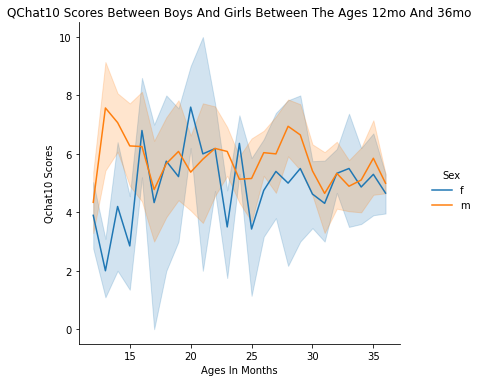

In [3]:
sns.relplot(y="Qchat-10-Score",x="Age_Mons",hue="Sex",data=tests,kind='line')
plt.title("QChat10 Scores Between Boys And Girls Between The Ages 12mo And 36mo")
plt.ylabel("Qchat10 Scores")
plt.xlabel("Ages In Months")

In [5]:
other_tests=autism[['Case_No','Age_Mons','Qchat-10-Score','Jaundice']]
other_tests


,Case_No,Age_Mons,Qchat-10-Score,Jaundice
0,1,28,3,yes
1,2,36,4,yes
2,3,36,4,yes
3,4,24,10,no
4,5,20,9,no
...,...,...,...,...
1049,1050,24,1,no
1050,1051,12,5,yes
1051,1052,18,9,yes
1052,1053,19,3,no


Text(11.318854166666668, 0.5, 'Ages In Months')

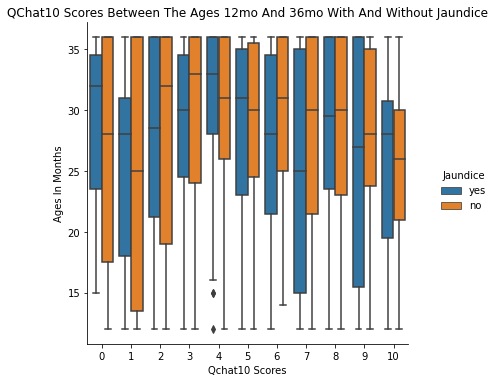

In [6]:
sns.catplot(x="Qchat-10-Score",y="Age_Mons",hue="Jaundice",data=other_tests,kind='box')
plt.title("QChat10 Scores Between The Ages 12mo And 36mo With And Without Jaundice" )
plt.xlabel("Qchat10 Scores")
plt.ylabel("Ages In Months")